In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sc
from scipy.optimize import curve_fit 



# Part 1: Measuring Gain and Read Noise

In [134]:
bias = []
lamp60 = []
lamp121 = []
lamp242 = []
#dark = []

for i in range(1,11):
    bias.append(fits.getdata("Bias-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    lamp60.append(fits.getdata("Lamp60-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    lamp121.append(fits.getdata("Lamp121-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    lamp242.append(fits.getdata("Lamp242-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    #dark.append(fits.getdata("Dark-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

In [135]:
bias = np.asarray(bias)

In [136]:
bias.shape

(10, 2504, 3326)

In [137]:
bbar = bias.mean(axis=0)

In [138]:
print(bbar)

[[ 994.4  984.7  982.3 ...  982.9  979.9  978.4]
 [ 991.6  996.1  993.1 ...  990.2  988.8  973. ]
 [ 981.3  980.3  992.  ...  987.8  977.7  984.5]
 ...
 [ 996.7  987.5  996.8 ...  988.7  993.2  996.3]
 [ 999.   995.8  991.8 ...  994.3 1009.8  990. ]
 [ 993.8  995.6 1008.2 ...  983.3 1003.1 1006.3]]


In [139]:
lamp60 = np.asarray(lamp60)

In [140]:
lamp60.shape

(10, 2504, 3326)

In [141]:
f60 = (lamp60-bbar)
f60mean = f60.mean()
f60var = np.var(f60, axis =0)
f60varmean = np.mean(np.var(f60, axis =0))
#f60varmean = f60var.mean()
print(f60mean)
print(f60var)
print(f60varmean)

1926.0478603086494
[[2380.69 4076.09 3244.8  ... 3529.89 3361.81 1810.44]
 [8573.61 1969.05 1466.29 ... 5016.04 5967.41 1063.6 ]
 [4374.09 3489.49 5249.89 ... 5418.56 6008.09 2107.85]
 ...
 [5285.69 1728.81 5265.69 ... 1657.29 4828.36 3868.36]
 [1894.49 2859.76 2062.65 ... 1686.04 1514.64 3159.41]
 [4432.89 1969.64 7090.29 ... 4051.05 6134.45 6418.24]]
4067.5900097642957


In [142]:
lamp121 = np.asarray(lamp121)

In [143]:
lamp121.shape

(10, 2504, 3326)

In [144]:
f121 = (lamp121-bbar)
f121mean = f121.mean()
f121var = np.var(f121, axis =0)
f121varmean = np.mean(np.var(f121, axis =0))
print(f121mean)
print(f121var)
print(f121varmean)

9371.133222238283
[[26494.84 24231.56 23820.01 ... 16089.4  20001.6  28854.61]
 [16878.44 14483.85  9631.29 ... 35149.8  28873.04 18594.69]
 [10284.49 15033.61 11976.85 ... 20120.44 26030.96 23999.41]
 ...
 [17460.29  4031.49 26872.6  ... 27196.64  8547.21 31954.36]
 [29807.56 12808.69 12740.44 ...  9841.41 15692.04  7399.56]
 [19161.29 25303.24 22641.01 ... 26864.36 40079.6   6024.81]]
19169.588255619637


In [151]:
lamp242 = np.asarray(lamp242)
lamp242.shape

(10, 2504, 3326)

In [152]:
f242 = (lamp242-bbar)
f242mean = f242.mean()
f242var = np.var(f242, axis =0)
f242varmean = np.mean(np.var(f242, axis =0))
print(f242mean)
print(f242var)
print(f242varmean)

27898.666591805406
[[ 21196.2   54727.04  47367.69 ...  80044.49  31564.81  32350.8 ]
 [ 45001.6   26293.49  60284.21 ...  79419.36  57015.64  39680.61]
 [ 62015.84  79325.44  35566.84 ...  50805.4   15836.29  75541.05]
 ...
 [ 69774.16  19064.61  41548.61 ...  65378.2   52748.4   55082.04]
 [ 33699.96  11625.69  35747.24 ...  28022.2   24253.76  82406.65]
 [ 28062.36  38253.49  29451.8  ...  78992.89 110332.81  41059.49]]
56629.258027756914


Gain Calculation

In [153]:
xvals = [f60varmean, f121varmean, f242varmean]
yvals = [f60mean, f121mean, f242mean]

def func(x,a,b):
    return a*x+b
    

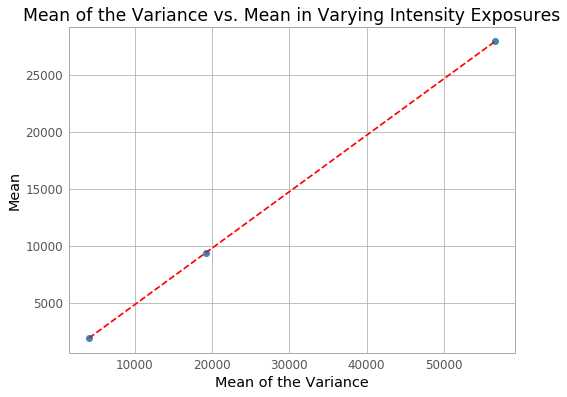

0.49422443888088546


In [154]:
plt.plot(xvals, yvals, 'o')
#plt.plot(xvals, yvals, 'r')
# manually fit the curve to obtain a viable set of starting parameters
at,bt = (0.5,0.00)
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(at,bt))
plt.plot(xvals, func(np.asarray(xvals),*coeffs), 'r--')
plt.title("Mean of the Variance vs. Mean in Varying Intensity Exposures")
plt.xlabel("Mean of the Variance")
plt.ylabel("Mean")
plt.show()
print(coeffs[0])

Read Noise Calculation

In [ ]:
gain = coeffs[0]
print(gain)

In [ ]:
rnoise = gain*bias.std(axis=0).mean()
print(rnoise)

# Part 2: Dark Current

In [203]:
bias2 = []

for i in range (1,21):
    bias2.append(fits.getdata("Bias2-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
dark1 = fits.getdata("GroupADarkT4.6Exp450.fit")
dark2 = fits.getdata("GroupADarkT8.9Exp300.fit")
dark3 = fits.getdata("GroupBDarkT6Exp300.fit")
dark4 = fits.getdata("GroupBDarkT9Exp600.fit")
dark5 = fits.getdata("GroupCDarkT7.1Exp400.fit")
dark6 = fits.getdata("GroupCDarkT9.4Exp300.fit")
dark7 = fits.getdata("GroupDDarkT7Exp600.fit")
dark8 = fits.getdata("GroupDDarkT9.4Exp300.fit")

In [ ]:
bias2 = np.asarray(bias2)
bias2.shape
#print(bias2)
bbbar = bias2.mean(axis=0)
#print(bbbar)

In [196]:
adjdrk1 = (dark1-bbbar)
adjdrk2 = (dark2-bbbar)
adjdrk3 = (dark3-bbbar)
adjdrk4 = (dark4-bbbar)
adjdrk5 = (dark5-bbbar)
adjdrk6 = (dark6-bbbar)
adjdrk7 = (dark7-bbbar)
adjdrk8 = (dark8-bbbar)
#😢sadness or 😍love? - the choice is yours
#drk1tempC = 4.6
#drk1tempK = drk2tempC + 273.15
#drk2tempC = 8.9
#drk2tempK = drk1tempC + 273.15
#drk3tempC = 6
#drk3tempK = drk3tempC + 273.15
#drk4tempC = 9
#drk4tempK = drk4tempC + 273.15

[68.0, 76.70000000000005, 54.85000000000002, 135.25]
[282.04999999999995, 277.75, 279.15, 282.15]


Text(0, 0.5, 'Dark Current (counts / second)')

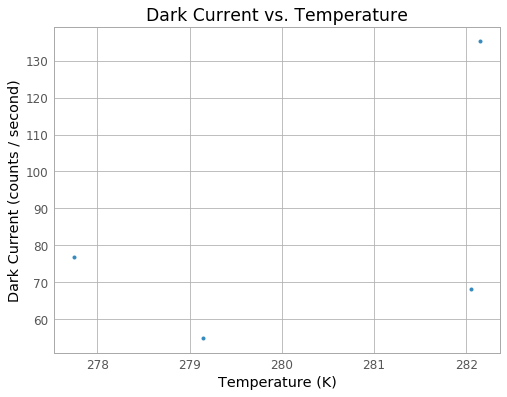

In [199]:
dark1med = np.median(adjdrk1)
dark2med = np.median(adjdrk2)
dark3med = np.median(adjdrk3)
dark4med = np.median(adjdrk4)

darks = [dark1med, dark2med, dark3med, dark4med]
temps = [drk1tempK, drk2tempK, drk3tempK, drk4tempK]

print(darks)
print(temps)

plt.plot(temps,darks, '.')
plt.title("Dark Current vs. Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Dark Current (counts / second)")